# Exploratory Data Analysis of the Indian StartUp Funding Ecosystem 

# Business Understanding

**Project Description:**

Explore the Indian startup funding ecosystem through an in-depth analysis of funding data from 2019 to 2021. Gain insights into key trends, funding patterns, and factors driving startup success. Investigate the relationship between funding and startup growth, with a focus on temporal patterns and city-level dynamics. Identify preferred sectors for investment and uncover industry-specific funding trends. This exploratory data analysis provides a comprehensive overview of the Indian startup ecosystem, offering valuable insights for entrepreneurs, investors, and policymakers.

## Data Understanding

This project aims to explore and gain a deeper understanding of the Indian startup funding ecosystem. The dataset used for analysis contains information about startup funding from 2019 to 2021. The dataset includes various attributes such as the company's name, sector, funding amount, funding round, investor details, and location.

To conduct a comprehensive analysis, we will examine the dataset to understand its structure, contents, and any potential data quality issues. By understanding the data, we can ensure the accuracy and reliability of our analysis.

The key attributes in the dataset include:

- **Company**: The name of the startup receiving funding.
- **Sector**: The industry or sector to which the startup belongs.
- **Amount**: The amount of funding received by the startup.
- **Stage**: The round of funding (e.g., seed, series A, series B).
- **Location**: The city or region where the startup is based.
- **About**: What the company does.
- **Funding Year**:When the company was funded

By examining these attributes, we can uncover insights about the funding landscape, identify trends in funding amounts and rounds, explore the preferred sectors for investment, and analyze the role of cities in the startup ecosystem.

Throughout the analysis, we will use visualizations and statistical techniques to present the findings effectively. By understanding the data and its characteristics, we can proceed with confidence in our analysis, derive meaningful insights, and make informed decisions based on the findings.

# First Dataset

#### Install pyodbc and python-dotenv

In [ ]:
%pip install pyodbc  
%pip install python-dotenv

# other modules that are necessary
%pip install pandas
%pip install seaborn
%pip3 install matplotlib
%pip install numpy
%pip install scipy 

#### Import all the necessary packages

In [7]:
# Importing the Modules needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

import re 

from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [4]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 
# Loads 2020 & 2021 datasets respectively
query1 = "SELECT * FROM dbo.LP1_startup_funding2020"
query2 = "SELECT * FROM dbo.LP1_startup_funding2021"
df3 = pd.read_sql(query1, connection)
df4 = pd.read_sql(query2, connection)

# Second Dataset

In [5]:
df2 = pd.read_csv('startup_funding2019.csv') # read the data_2019 and convert it to pandas data frame

# Third Dataset

In [6]:
df = pd.read_csv('startup_funding2018.csv') # read the data_2018 and convert it to pandas data frame 

### Hypothesis:

#### NULL Hypothesis (HO) :

#### **The sector of a company does not have an impact on the amount of funding it receives.**


#### ALTERNATE Hypothesis (HA):

#### **The sector of a company does have an impact on the amount of funding it receives.**

##  Research / Analysis Questions:

1. What are the most common industries represented in the datasets?

2. How does the funding amount vary across different rounds/series in the datasets?
   
3. Which locations have the highest number of companies in the datasets?
   
4. What kind of investment type should startups look for depending on their industry type? (EDA: Analysis of funding preferences by industry)

5. Are there any correlations between the funding amount and the company's sector or location?
   
6. What are the top investors in the datasets based on the number of investments made?
   
7. Which industries are favored by investors based on the number of funding rounds? (EDA: Top 10 industries which are favored by investors)

8. Are there any outliers in the funding amounts in the datasets?
   
9.  Is there a relationship between the company's sector and the presence of certain investors?
    
10. What is the range of funds generally received by startups in India (Max, min, avg, and count of funding)? (EDA: Descriptive statistics of funding amounts)

## Data Preparation

Before diving into the analysis, we will preprocess and clean the data to ensure its quality and suitability for analysis. This may involve handling missing values, correcting data types, and addressing any inconsistencies or outliers that could affect the accuracy of our results.

Once the data is prepared, we will be ready to perform an in-depth exploratory analysis of the Indian startup funding ecosystem. The analysis will involve answering specific research questions, identifying patterns and trends, and generating meaningful visualizations to present the findings.

Through this process of data understanding and preparation, we will set a solid foundation for conducting a robust and insightful analysis of the Indian startup funding data.

**The data for each year is sourced from separate two csv files and two from a remote server. They will be merged later to one dataset**

## Load & Clean Datasets

# 2018 Data

In [8]:
df.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [9]:
df.shape

(526, 6)

In [10]:
df.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [12]:
df.describe(include='object').T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


## Handling Duplicated Data

In [13]:
# below we are checking duplicates values withinn the columns 

columns_to_check = ['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location', 'About Company']

for column in columns_to_check:
    has_duplicates = df[column].duplicated().any()
    print(f'{column}: {has_duplicates}')

Company Name: True
Industry: True
Round/Series: True
Amount: True
Location: True
About Company: True


In [14]:
df.drop_duplicates(subset=['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location', 'About Company'], inplace=True)

Standardizing Data Formats

now let's see how we can standardize tha data set to make sure we have the same format of data points 

first let's check for dash symbols within the columns using a simple python function 

In [15]:
# below we are checking for '-' symbols within the columns

columns_to_check = ['Amount', 'Company Name', 'Location', 'About Company', 'Industry', 'Round/Series']

for column in columns_to_check:
    has_dash_symbols = df[column].str.contains('—').any()
    print(f"{column}: {has_dash_symbols}")

Amount: True
Company Name: False
Location: False
About Company: False
Industry: True
Round/Series: False


### Amount Column

In [16]:
df['Amount'].head() # first let's look at the Amount the column

0         250000
1    ₹40,000,000
2    ₹65,000,000
3        2000000
4              —
Name: Amount, dtype: object

## Assumptions Made for Amount Column
- Amounts without currency symbols in the 2018 dataset are in USD.
- The average Indian Rupee (INR) to US Dollar (USD) rate for the relevant year will be used for currency conversions.
- Use exchange rate from https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html, use the average exchange rate of 0.0146

In [17]:
# Set the desired exchange rate
exchange_rate = 0.0146

# Cleaning the Amounts column
df['Amount'] = df['Amount'].apply(str)
df['Amount'].replace([',', '—', '$'], ['', 0, ''], inplace=True, regex=True)

# Extract the Indian currency amount
df['Indiancurr'] = df['Amount'].str.rsplit('₹', n=2).str[1]
df['Indiancurr'] = df['Indiancurr'].apply(float).fillna(0)

# Convert Indian currency to USD using the specified exchange rate
df['UsCurr'] = df['Indiancurr'] * exchange_rate

# Replace 0 values with NaN
df['UsCurr'] = df['UsCurr'].replace(0, np.nan)

# Fill NaN values in 'UsCurr' with original 'Amount' values
df['UsCurr'] = df['UsCurr'].fillna(df['Amount'])

# Remove '$' symbol from 'UsCurr' column
df['UsCurr'] = df['UsCurr'].replace("$", "", regex=True)

# Update 'Amount' column with converted USD values
df['Amount'] = df['UsCurr'].apply(lambda x: float(str(x).replace("$","")))

# Replace 0 values with NaN in 'Amount' column
df['Amount'] = df['Amount'].replace(0, np.nan)

# Format the 'Amount' column
format_amount = lambda amount: "{:,.2f}".format(amount)
df['Amount'] = df['Amount'].map(format_amount)

In [18]:
df['Amount'] = df['Amount'].str.replace(',', '').astype(float) # since the Amount column is holding and amount, we have to comvert it to float
type(df['Amount'][0])

numpy.float64

In [19]:
df.drop(columns=['Indiancurr','UsCurr'], inplace=True) # dropping some colunmns we need no more 

In [20]:
df['Amount'].head()

0     250000.0
1     584000.0
2     949000.0
3    2000000.0
4          NaN
Name: Amount, dtype: float64

#### Handling Categorical Data
NOW LET'S 

handle the categorical data in the 'Industry', 'Round/Series', and 'Location' columns

Analyzing unique values
Start by examining the unique values in each column to identify any inconsistencies or variations we do this 
Using the unique() function to get the unique values in each column.

### Location Column

#### The Location column contains combined information (e.g., city, state, country)

In [21]:
df['Location'].unique() # checking each unique values 

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [22]:
# The 'Location' column is in the format, 'City, Region, Country',
# Only 'City' aspect is needed for this analysis
# Take all character until we reach the first comma sign

df['Location'] = df['Location'].apply(str)
df['Location'] = df['Location'].str.split(',').str[0]
df['Location'] = df['Location'].replace("'","",regex=True)

In [23]:
# From observation, some city names that refer to the same place are appearing different.
# The incorrect names need to be rectified for correct analysis, eg A city with more than one name.
df["Location"] = df["Location"].replace (['Bangalore','Bangalore City'], 'Bengaluru')
df.loc[~df['Location'].str.contains('New Delhi', na=False), 'Location'] = df['Location'].str.replace('Delhi', 'New Delhi')
df['Location'] = df['Location'].replace (['Gurgaon'], 'Gurugram')

In [24]:
df['Location'].unique() # checking the unique values once more

array(['Bengaluru', 'Mumbai', 'Gurugram', 'Noida', 'Hyderabad', 'Kalkaji',
       'New Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum',
       'Ernakulam', 'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore',
       'Ghaziabad', 'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal',
       'Coimbatore', 'Worli', 'Alleppey', 'Chandigarh', 'Guindy',
       'Lucknow'], dtype=object)

In [25]:
df['Location'].isnull().sum() # checking for null values in the loaction column

0

### Industry Column

In [26]:
df['Industry'] # taking a look at the Industry column first to have some insight into the column 

0      Brand Marketing, Event Promotion, Marketing, S...
1                                   Agriculture, Farming
2       Credit, Financial Services, Lending, Marketplace
3                            Financial Services, FinTech
4                     E-Commerce Platforms, Retail, SaaS
                             ...                        
521     B2B, Business Development, Internet, Marketplace
522                                      Tourism, Travel
523           Food and Beverage, Food Delivery, Internet
524                               Information Technology
525           Biotechnology, Health Care, Pharmaceutical
Name: Industry, Length: 525, dtype: object

In [27]:
# let's check all the unique values in the industry column
df['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [28]:
df['Industry'].value_counts() # counting all the unique values in the Industry column 

Industry
—                                                                                 30
Financial Services                                                                15
Education                                                                          8
Information Technology                                                             7
Finance, Financial Services                                                        5
                                                                                  ..
Business Intelligence, Customer Service, Market Research, SaaS                     1
Digital Media, Internet, Media and Entertainment, Online Portals, Social Media     1
Consumer Lending, Financial Services, Lending, Personal Finance                    1
Education, Information Technology, Internet, Mobile, Software                      1
Biotechnology, Health Care, Pharmaceutical                                         1
Name: count, Length: 405, dtype: int64

In [29]:
df[df['Industry']=='—']

,Company Name,Industry,Round/Series,Amount,Location,About Company
58,MissMalini Entertainment,—,Seed,1518400.0,Mumbai,MissMalini Entertainment is a multi-platform n...
105,Jagaran Microfin,—,Debt Financing,8030000.0,Kolkata,Jagaran Microfin is a Microfinance institution...
121,FLEECA,—,Seed,NaN,Jaipur,FLEECA is a Tyre Care Provider company.
146,WheelsEMI,—,Series B,14000000.0,Pune,"WheelsEMI is the brand name of NBFC, WheelsEMI..."
153,Fric Bergen,—,Venture - Series Unknown,NaN,Alwar,Fric Bergen is a leader in the specialty food ...
174,Deftouch,—,Seed,NaN,Bengaluru,Deftouch is a mobile game development company ...
181,Corefactors,—,Seed,NaN,Bengaluru,"Corefactors is a leading campaign management, ..."
210,Cell Propulsion,—,Seed,102200.0,Bengaluru,Cell Propulsion is an electric mobility startu...
230,Flathalt,—,Angel,50000.0,Gurugram,FInd your Customized Home here.
235,dishq,—,Seed,400000.0,Bengaluru,dishq leverages food science and machine learn...


In [30]:
# renaming some of the Company names to their official names
company_mapping = {
    'dishq': 'DISH',
    'HousingMan.com': 'HousingMan',
    'ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED': 'ENLYFT DIGITAL SOLUTIONS',
    'Toffee': 'Toffee Pvt Ltd',
    'Avenues Payments India Pvt. Ltd.': 'Avenues Payments',
    'Planet11 eCommerce Solutions India (Avenue11)': 'Planet11',
}
# Replace the dash symbol with the corresponding values using map function
df['Company Name'].replace(company_mapping, inplace=True)

In [31]:
df.loc[df['Company Name'] == 'MissMalini Entertainment', 'Industry'] = 'Media'
df.loc[df['Company Name'] == 'Jagaran Microfin', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'FLEECA', 'Industry'] = 'Automotive'
df.loc[df['Company Name'] == 'WheelsEMI', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'Fric Bergen', 'Industry'] = 'Food'
df.loc[df['Company Name'] == 'Deftouch', 'Industry'] = 'Gaming'
df.loc[df['Company Name'] == 'Corefactors', 'Industry'] = 'Technology'
df.loc[df['Company Name'] == 'Cell Propulsion', 'Industry'] = 'Automotive'
df.loc[df['Company Name'] == 'Flathalt', 'Industry'] = 'Real Estate'
df.loc[df['Company Name'] == 'DISH', 'Industry'] = 'Food'
df.loc[df['Company Name'] == 'Trell', 'Industry'] = 'Travel'
df.loc[df['Company Name'] == 'HousingMan', 'Industry'] = 'Real Estate'
df.loc[df['Company Name'] == 'Steradian Semiconductors', 'Industry'] = 'Technology'
df.loc[df['Company Name'] == 'SaffronStays', 'Industry'] = 'Travel'
df.loc[df['Company Name'] == 'Inner Being Wellness', 'Industry'] = 'Beauty'
df.loc[df['Company Name'] == 'MySEODoc', 'Industry'] = 'Marketing'
df.loc[df['Company Name'] == 'ENLYFT DIGITAL SOLUTIONS', 'Industry'] = 'Marketing'
df.loc[df['Company Name'] == 'Scale Labs', 'Industry'] = 'Ecommerce'
df.loc[df['Company Name'] == 'Roadcast', 'Industry'] = 'Logistics'
df.loc[df['Company Name'] == 'Toffee Pvt Ltd', 'Industry'] = 'Insurance'
df.loc[df['Company Name'] == 'ORO Wealth', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'Finwego', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'Cred', 'Industry'] = 'Fintech'
df.loc[df['Company Name'] == 'Origo', 'Industry'] = 'Agriculture'
df.loc[df['Company Name'] == 'Sequretek', 'Industry'] = 'Cyber Security'
df.loc[df['Company Name'] == 'Avenues Payments', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'Planet11', 'Industry'] = 'E-commerce'
df.loc[df['Company Name'] == 'Iba Halal Care', 'Industry'] = 'Beauty'
df.loc[df['Company Name'] == 'Togedr', 'Industry'] = 'Travel'
df.loc[df['Company Name'] == 'Scholify', 'Industry'] = 'Edutech'

In [32]:
df[df['Industry']=='—']

,Company Name,Industry,Round/Series,Amount,Location,About Company


In [33]:
# keeping only the first unique vlaues in the Industry column
df['Industry'] = df['Industry'].str.split(',').str[0]
#converting the industry names in the column to title case
df['Industry'] = df['Industry'].str.title()

In [34]:
# remove the leading or trailing spaces from the industry names in the 'Industry' column
df['Industry'] = df['Industry'].str.strip()

In [35]:
df['Industry'].isnull().sum() # confirming the null values in the industry column 

0

### Round/Series Column

In [36]:
df['Round/Series'].unique() # getting the unique values 

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [37]:
# below we are replacing some unique values such as undisclosed with nan and remove some inconsistency from the data

df['Round/Series']=df['Round/Series'].replace('Undisclosed',np.nan)
df['Round/Series']=df['Round/Series'].replace('Venture - Series Unknown',np.nan)
df['Round/Series'] = df['Round/Series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'nan')
df['Round/Series'] = df['Round/Series'].replace('nan', np.nan)

In [38]:
df['Round/Series'].unique() # getting the unique values 

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', nan, 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Series H', 'Series C', 'Series E', 'Corporate Round', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [39]:
df['Round/Series'].isnull().sum() # checking for null values

40

In [40]:
len(df['Round/Series'])

525

NOW LET'S DEAL WITH THE NULL VALUES IN THE ROUND/SERIES 

In [41]:
most_frequent_stage = df['Round/Series'].mode()[0]
df['Round/Series'].fillna(most_frequent_stage, inplace=True)

In [42]:
df['Round/Series'].isnull().sum()

0

In [43]:
df['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Series H', 'Series C', 'Series E', 'Corporate Round', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [44]:
# here we want to check for null values in the entire data set
df.isnull().sum()

Company Name       0
Industry           0
Round/Series       0
Amount           148
Location           0
About Company      0
dtype: int64

In [45]:
# first let's check for the percentage of missing values in the Amount column
Amount_missing = df['Amount'].isna().sum()
Amount_total = df['Amount'].count()
percent_Amount_missing = (Amount_missing / Amount_total) * 100
percent_Amount_missing

39.257294429708224

NOW LET'S DEAL WITH THE AMOUNT COLUMN

TO TAKE OF THE NULL OR MISSING VALUES. WE WILL FIRST NEED TO UNDERSTAND THE PATTERN OF THE MISSING DATA 

first let's identify if there is any relationship between the missing values and the diffferent sectors 
this insight into the missing value will guide us on how to properly impute for the missing values 

We will start by creating a contingency table to show the distribution of missing values across the different
Sectors 

NOTE: this table and test is to help us prove or reject a hypothesis, by conducting a chi-square test 
Using the chi2_contingency function from the scipy.stats module to perform the chi-square test, this function calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies

but we will only look at the p-value with a specific chosen significant value 

Finally, we will interprete the result of the p-value, if the p-value is below a chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that there is a significant association between the missing values in the "Amount" column and the "Sector" column.

BELOW IS THE HYPOTHESIS AND THE ALTERNATIVE HYPOTHESIS

Null hypothesis (H0): There is no association between the missing values in the "Amount" column and the "Sector" column.

Alternative hypothesis (H1): There is a significant association between the missing values in the "Amount" column and the "Sector" column

Creating a contingency table:

 we will use the pd.crosstab() function to create a contingency table that will shows the distribution of missing values across the different sectors. This table will help us visualize the association between the two variables.

In [46]:
# creating the contingency table

conting_table = pd.crosstab(df['Industry'], df['Amount'].isnull())
conting_table

Amount,False,True
Industry,,
3D Printing,0,1
Accounting,2,1
Advertising,2,2
Aerospace,1,1
Agriculture,4,5
...,...,...
Travel,4,2
Veterinary,1,0
Wealth Management,1,0


 now let's Perform the chi-square test: 

 Using the chi2_contingency() function from the scipy.stats module we will perform the chi-square test. This function calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies.

In [47]:
# below we are performing the chi-square test
chi2, p_value, _,_ = chi2_contingency(conting_table)
p_value

0.2887474177533935

Interpreting the results:

Checking the p-value obtained from the chi-square test.

If the p-value is below our chosen significance level (in this case 0.05), we can reject the null hypothesis and conclude that there is a significant association between the missing values in the "Amount" column and the "Sector" column. If the p-value is above the significance level, we fail to reject the null hypothesis.

In [48]:
# we are interpretting the chi-sqaure test 
significance_level = 0.05

if p_value < significance_level:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")


There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


From the above output we can drop this approach to fill in the missing values 

THE NEXT APPROACH IS TO USE THE: 


Missing Data Patterns: 

We will analyze the patterns of missing values in the 'Amount' column and other relevant columns, in our case the 'Amount', 'Sector', 'Stage', 'Location' If the missing values are missing completely at random (MCAR) or missing at random (MAR), it may indicate that imputation methods like median imputation could be suitable.

1. MISSING DATA HEAT MAP

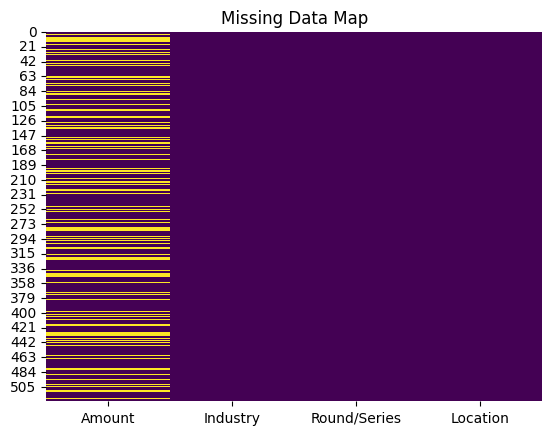

In [49]:
# creating a subset of the relevant columns
rele_col = ['Amount', 'Industry', 'Round/Series', 'Location']

# creating a dataframe with missing value indicator 
missing_indicator_df = df[rele_col].isnull()

# below we are creating a missing data heat map
sns.heatmap(missing_indicator_df, cmap='viridis', cbar=False)
plt.title('Missing Data Map')
plt.show()

The information from the above supports the assumption that the missing values in the 'Amount' column are missing completely at random (MCAR) or missing at random (MAR). This means that the missingness is unrelated to the 'Sector', 'Location', or 'Stage' variables.

Based on this pattern of missingness, median imputation could be a reasonable option to impute the missing values in the 'Amount' column.

NOW LET'S IMPUTE THE MISSING VALUES USING THE MEDIAN IMPUTATION 

In [50]:
# we are creating the median of the not missing values 
median_non_null_Amount = df['Amount'].dropna()

median_Amount = median_non_null_Amount.median() 

# below we are filling in the missing values with the median 
df['Amount'].fillna(median_Amount, inplace=True)

NOW LET'S CONFRIM THE AMOUNT FOR MISSING VALUES AGAIN 

In [51]:
df['Amount'].isnull().sum() # checking for null values 

0

## Clean categorical Data

In [53]:
# Clean Company Name column
df['Company Name'] = df['Company Name'].str.strip()  # Remove leading and trailing spaces
df['Company Name'] = df['Company Name'].str.title()  # Standardize capitalization

# Clean About Company column
df['About Company'] = df['About Company'].str.strip()  # Remove leading and trailing spaces

# Function to handle special characters or encoding issues
def clean_text(text):
    # Remove special characters using regex
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return cleaned_text

# Apply the clean_text function to the About Company column
df['About Company'] = df['About Company'].apply(clean_text)

In [54]:
df.columns # checking the columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [55]:
df.insert(6,"Funding Year", 2018) # inserting a new column 'startup_funding 2018' to keep track of this data set

In [56]:
# below are renaming the columns to ensure consistency when combining the four data sets 

df.rename(columns = {'Company Name':'Company',
                        'Industry':'Sector',
                        'Amount':'Amount',
                        'About Company':'About',
                        'Round/Series' : 'Stage'},
             inplace = True)

In [57]:
df.head() # finally confirming the head of the data to be sure of all changes before saving the data

,Company,Sector,Stage,Amount,Location,About,Funding Year
0,Thecollegefever,Brand Marketing,Seed,250000.0,Bengaluru,TheCollegeFever is a hub for fun fiesta and fr...,2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,Myloancare,Credit,Series A,949000.0,Gurugram,Leading Online Loans Marketplace in India,2018
3,Payme India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


In [58]:
df.to_csv('df_2018.csv', index=False) # here we are saveing the clean data and naming it df18.csv

## 2019 Data

In [59]:
df.head()

,Company,Sector,Stage,Amount,Location,About,Funding Year
0,Thecollegefever,Brand Marketing,Seed,250000.0,Bengaluru,TheCollegeFever is a hub for fun fiesta and fr...,2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,Myloancare,Credit,Series A,949000.0,Gurugram,Leading Online Loans Marketplace in India,2018
3,Payme India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


In [60]:
df.shape

(525, 7)

In [61]:
df.columns

Index(['Company', 'Sector', 'Stage', 'Amount', 'Location', 'About',
       'Funding Year'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       525 non-null    object 
 1   Sector        525 non-null    object 
 2   Stage         525 non-null    object 
 3   Amount        525 non-null    float64
 4   Location      525 non-null    object 
 5   About         525 non-null    object 
 6   Funding Year  525 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 49.0+ KB


In [64]:
df.describe(include='object').T   # getting General descriptive statistics of the data2 dataFrame

,count,unique,top,freq
Company,525,525,Thecollegefever,1
Sector,525,154,Financial Services,31
Stage,525,18,Seed,319
Location,525,47,Bengaluru,161
About,525,524,Algorithmic trading platform,2


### Handling Duplicated Data

In [65]:
# below we are checking for duplicated values within the columns 

columns_to_check2 = ['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage',]

for column2 in columns_to_check2:
    has_duplicates2 = df2[column2].duplicated().any()
    print(f'{column2}: {has_duplicates2}')

Company/Brand: True
Founded: True
HeadQuarter: True
Sector: True
What it does: True
Founders: True
Investor: True
Amount($): True
Stage: True


In [66]:
# below we are dropping all the duplicated rows within the colums

df2.drop_duplicates(subset=['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage',], inplace=True)

now we have some description about the data set, we can now move on with data cleaning
 
Check  MISSING VALUES 

In [67]:
missing_values2 = df2.isnull().sum() # looking for missing values in dataFrame 2
missing_values2

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

LET'S DEAL WITH THE MISSING VALUES FROM THE ABOVE OUTPUT

### HeadQuarter Column

### The company/Brand Column has actual data from existing startups. The null Headquarter values can be filled by searching the HeadQuarters on Google

In [68]:
#fillna values in HeadQuarter column

# using google we are able to get accurate info about the Company's headquater

df2.loc[df2['Company/Brand'] == 'Bombay Shaving', 'HeadQuarter'] = 'Gurugram'
df2.loc[df2['Company/Brand'] == 'Quantiphi', 'HeadQuarter'] = 'Marlborough'
df2.loc[df2['Company/Brand'] == 'Open Secret', 'HeadQuarter'] = 'Mumbai'
df2.loc[df2['Company/Brand'] == "Byju's", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Witblox", 'HeadQuarter'] = 'Mumbai'
df2.loc[df2['Company/Brand'] == "SalaryFits", 'HeadQuarter'] = 'London'
df2.loc[df2['Company/Brand'] == "Pristyn Care", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "Springboard", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Fireflies .ai", 'HeadQuarter'] = 'San Francisco'
df2.loc[df2['Company/Brand'] == "Bijak", 'HeadQuarter'] = 'New Delhi'
df2.loc[df2['Company/Brand'] == "truMe", 'HeadQuarter'] = 'Gurugram'
df2.loc[df2['Company/Brand'] == "Rivigo", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "VMate", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "Slintel", 'HeadQuarter'] = 'California'
df2.loc[df2['Company/Brand'] == "Ninjacart", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Zebu", 'HeadQuarter'] = 'London'
df2.loc[df2['Company/Brand'] == "Phable", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Zolostays", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == 'Cubical Labs', 'HeadQuarter'] = 'New Delhi'


In [69]:
# below we are replacing some names within the columns with their official names.
# This ensures uniformity of the names

df2.loc[~df2['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df2['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df2["HeadQuarter"] = df2["HeadQuarter"].replace (['Bangalore','Bangalore City'], 'Bengaluru')
df2['HeadQuarter'] = df2['HeadQuarter'].replace (['Gurgaon'], 'Gurugram')

In [74]:
df2['HeadQuarter'].isnull().sum() #Check if all null values in HeadQuarter have been filled

0

In [71]:
df2['HeadQuarter'].unique()

array(['Gurugram', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bengaluru',
       'Noida', 'Marlborough', 'New Delhi', 'Ahmedabad', 'London',
       'Haryana', 'San Francisco', 'Chandigarh', 'Jaipur', 'California',
       'Surat', 'Uttar pradesh', 'Hyderabad', 'Rajasthan'], dtype=object)

### Sector Column

In [72]:
#fillna values in Sector column by Google Search
df2.loc[df2['Company/Brand'] == 'VMate', 'Sector'] = 'Short Video Platform'
df2.loc[df2['Company/Brand'] == 'Awign Enterprises', 'Sector'] = 'Workforce Solutions'
df2.loc[df2['Company/Brand'] == 'TapChief', 'Sector'] = 'Online Consulting'
df2.loc[df2['Company/Brand'] == 'KredX', 'Sector'] = 'Fintech'
df2.loc[df2['Company/Brand'] == 'm.Paani', 'Sector'] = 'E-commerce'

In [73]:
df2['Sector'].isnull().sum() # confirming the null values again

0

In [75]:
df2['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media',
       'Short Video Platform', 'E-Sports', 'Workforce Solutions',
       'Cosmetics', 'B2B', 'Online Consulting', 'Jewellery',
       'B2B Supply Chain', 'Games', 'Food & tech', 'Accomodation',
       'Automotive tech', 'Legal tech', 'Mutual Funds', 'Cybersecurity',
       'Automobile', 'Sports', 'Healthtech', 'Yoga & wellness',
       'Virtual Banking', 'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

### Stage Column

In [76]:
df2['Stage'].value_counts() # checking for value counts in the stage column

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [77]:
df2['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [78]:
df2['Stage'].isnull().sum()

46

In [79]:
most_frequent_stage = df2['Stage'].mode()[0]
df2['Stage'].fillna(most_frequent_stage, inplace=True)

In [80]:
df2.isnull().sum() # let's check for null vlaues and sum them up 

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage             0
dtype: int64

Standardizing Data Formats

now let's see how we can standardize tha data set to make sure we have the same format of data points 

first let's check for dash symbols within the columns using a simple python function 

In [81]:
# checking for '-' symbol within the columns

columns_to_check2 = ['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Amount($)', 'Stage']

for column2 in columns_to_check2:
    has_dash_symbols2 = df2[column2].astype(str).str.contains('-').any()
    print(f'{column2}: {has_dash_symbols2}')

Company/Brand: False
HeadQuarter: False
Sector: True
What it does: True
Amount($): False
Stage: True


In [83]:
df2[df2['Sector'].str.contains('-', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
9,Lenskart,2010.0,New Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,Series A
32,Pumpkart,2014.0,Chandigarh,E-marketplace,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,Undisclosed,Series A
38,Freshokartz,2016.0,Jaipur,E-marketplace,Online fruits and vegetables delivery company,Rajendra Lora,ThinkLab,"$150,000",Pre series A
42,Bombay Shirt Company,2012.0,Mumbai,E-commerce,Online custom shirt brand,Akshay Narvekar,Lightbox Ventures,"$8,000,000",Series A
44,MyGameMate,NaN,Bengaluru,E-Sports,eSports platform where players can access vari...,Parshavv Jain& Raju Kushwaha,"Jindagi Live Angels,","$100,000",Series A
57,m.Paani,NaN,Mumbai,E-commerce,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A
64,Moms Co,NaN,New Delhi,E-commerce,It is into mother and baby care-focused consum...,Malika Sadani,"Saama Capital, DSG Consumer Partners","$5,000,000",Series B


In [86]:
df2[df2['Stage'].str.contains('-', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
82,Kratikal,NaN,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A


In [87]:
# checking for currency symbol 

columns_to_check2 = ['Company/Brand','HeadQuarter', 'Sector', 'What it does', 'Amount($)']

for column2 in columns_to_check2:
    has_currency_symbols = df2[column2].astype(str).str.contains('[$₹]').any()
    print(f'{column2}: {has_currency_symbols}')

Company/Brand: False
HeadQuarter: False
Sector: False
What it does: False
Amount($): True


### Amount Column

### Clean and format the amount the column correctly 

In [88]:
df2['Amount($)'].unique() # let's check for unique values 

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [89]:
# Cleaning the Amounts column & removing the currency symbol in df_2019
df2['Amount($)'] = df2['Amount($)'].astype(str).str.replace('[\₹$,]', '', regex=True)
df2['Amount($)'].replace('Undisclosed', np.nan, inplace=True, regex=True)
df2['Amount($)'].replace([',', '—', '$'], ['', 0, ''], inplace=True, regex=True)
df2['Amount($)'].replace(0, np.nan, inplace=True)

In [90]:
df2['Amount($)'] = df2['Amount($)'].astype(float) # here we are converting the amount column to float data type 
type(df2['Amount($)'][0])

numpy.float64

In [91]:
df2['Amount($)'] # here we are looking at the Amount column 

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount($), Length: 89, dtype: float64

In [93]:
df2['Amount($)'].unique() # this line of code looks at the unique value 

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06,       nan,
       1.000e+06, 2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05,
       5.400e+08, 1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07,
       1.500e+06, 5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07,
       3.200e+07, 2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08,
       8.000e+06, 1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06,
       3.600e+07, 5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07,
       2.200e+05, 2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06,
       6.930e+08, 3.300e+07])

In [92]:
df2['Amount($)'].isnull().sum()

12

In [94]:
# first let's check for the percentage of missing values in the Amount column
Amount_missing = df2['Amount($)'].isnull().sum()
Amount_total = df2['Amount($)'].count()
percent_Amount_missing = (Amount_missing / Amount_total) * 100
percent_Amount_missing

15.584415584415584

### Missing Values Analysis - Relationship Between "Amount" and "Sector"

To handle the null or missing values in the "Amount" column, it is essential to understand the pattern of the missing data. We will investigate if there is any relationship between the missing values and the different sectors. This insight into the missing values will guide us in properly imputing for the missing data.

**Contingency Table:**
We will begin by creating a contingency table to illustrate the distribution of missing values across the various sectors. This table will help visualize the potential association between the two variables. To achieve this, we will use the `pd.crosstab()` function.

**Chi-Square Test:**
To assess the association between missing values in the "Amount" column and the "Sector" column, we will perform a chi-square test. This test will be carried out using the `chi2_contingency()` function from the `scipy.stats` module. The chi-square test will calculate the chi-square statistic, p-value, degrees of freedom, and expected frequencies.

**Hypotheses:**
We will set up two hypotheses for the chi-square test:

- **Null hypothesis (H0):** There is no association between the missing values in the "Amount" column and the "Sector" column.
- **Alternative hypothesis (H1):** There is a significant association between the missing values in the "Amount" column and the "Sector" column.

**Interpreting the Results:**
The critical part of the analysis will be to examine the p-value obtained from the chi-square test. If the p-value is below a chosen significance level (e.g., 0.05), the null hypothesis can be rejected. This rejection indicates a significant association between the missing values in the "Amount" column and the "Sector" column.

The contingency table and the chi-square test will help us gain insights into the relationship between missing values and sectors, thereby aiding the decision on appropriate strategies for handling the missing data.

In [95]:
# creating the contingency table

conting_table = pd.crosstab(df2['Sector'], df2['Amount($)'].isnull())
conting_table

Amount($),False,True
Sector,,
AI,2,0
AI & Tech,1,0
Accomodation,2,0
AgriTech,4,0
Automobile,3,0
Automobile & Technology,1,0
Automotive tech,2,0
B2B,1,0
B2B Supply Chain,0,1


In [96]:
# below we are performing the chi-square test
chi2, p_value, _,_ = chi2_contingency(conting_table)
p_value

0.25498309083953885

In [97]:
# we are interpretting the chi-sqaure test 
significance_level = 0.05

if p_value < significance_level:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")

There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


## Missing Data Heat Map

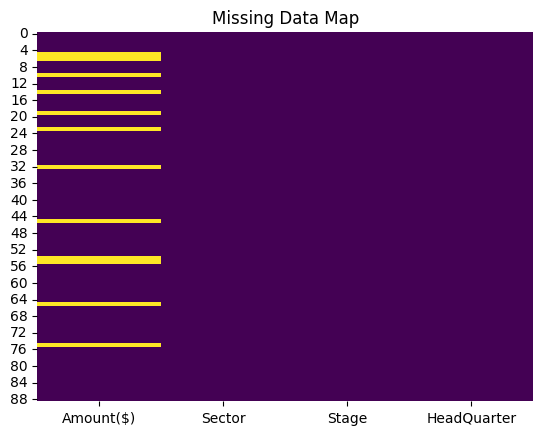

In [98]:
# creating a subset of the relevant columns
rele_col = ['Amount($)', 'Sector', 'Stage', 'HeadQuarter']

# creating a dataframe with missing value indicator 
missing_indicator_df = df2[rele_col].isnull()

# below we are creating a missing data heat map
sns.heatmap(missing_indicator_df, cmap='viridis', cbar=False)
plt.title('Missing Data Map')
plt.show()

In [99]:
# we are creating the median of the not missing values 
median_non_null_Amount = df2['Amount($)'].dropna()

median_Amount = median_non_null_Amount.median() 

# below we are filling in the missing values with the median 
df2['Amount($)'].fillna(median_Amount, inplace=True)

In [100]:
df2['Amount($)'].isnull().sum() # checking for null values 

0

### Clean Categorical Data

In [101]:
# Clean Company Name column
df2['Company/Brand'] = df2['Company/Brand'].str.strip()  # Remove leading and trailing spaces
df2['Company/Brand'] = df2['Company/Brand'].str.title()  # Standardize capitalization

# Clean Company Name column
df2['Sector'] = df2['Sector'].str.strip()  # Remove leading and trailing spaces
df2['Sector'] = df2['Sector'].str.title()  # Standardize capitalization

# Clean About Company column
df2['What it does'] = df2['What it does'].str.strip()  # Remove leading and trailing spaces

# Function to handle special characters or encoding issues
def clean_text(text):
    # Remove special characters using regex
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return cleaned_text

# Apply the clean_text function to the About Company column
df2['What it does'] = df2['What it does'].apply(clean_text)

In [102]:
# Dropping the columns that are not important to our analysis

df2.drop(columns=['Founded','Founders','Investor'], inplace=True)

In [103]:
df2.insert(6,"Funding Year", 2019) # here we are inserting a new column to keep track of the data set after combining 

In [104]:
# below we are renaming the columns to enure consistency 

df2.rename(columns = {'Company/Brand':'Company',
                        'HeadQuarter':'Location',
                        'Amount($)':'Amount',
                        'What it does':'About'},
             inplace = True)

In [105]:
df2.isnull().sum()

Company         0
Location        0
Sector          0
About           0
Amount          0
Stage           0
Funding Year    0
dtype: int64

In [106]:
df2.head() # let's comfirm the data set by looking at the head before we save it 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Bombay Shaving,Gurugram,Ecommerce,Provides a range of male grooming products,6300000.0,Series A,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topicbased j...,150000000.0,Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games,28000000.0,Fresh funding,2019
3,Homelane,Chennai,Interior Design,Provides interior designing solutions,30000000.0,Series D,2019
4,Nu Genes,Telangana,Agritech,It is a seed company engaged in production pro...,6000000.0,Series A,2019


In [107]:
df2.to_csv('df_2019.csv', index=False) # here we are saving the set and naming it df_19.csv

# 2020 Data